# Run this cell before beginning!

In [65]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

# prefix url for data files that students will upload
_url_prefix = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/"
fund_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_fundamental_reference_data.csv"
over_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_overtone_reference_data.csv"

reference_fundamental = np.loadtxt(fund_url,  delimiter=',')
reference_overtone = np.loadtxt(over_url, delimiter=',')

# fundamental
x_f = reference_fundamental[:,1]
y_f = reference_fundamental[:,0]

# overtone
x_o = reference_overtone[:,1]
y_o = reference_overtone[:,0]

def extract_fit(x, y):
    """ 
    Fit a 3rd order polynomial to the data
    and return a dictionary containing the
    coefficients and the polynomial
    evaluated along a grid of 100 points
    """
    
    # fit polynomial
    coeffs = np.polyfit(x, y, 3)
    
    # Create a new x array for the fitted curve
    x_fit = np.linspace(x[0], x[-1], 100)
    
    # Evaluate the fitted curve at the new x value
    y_fit = np.polyval(coeffs, x_fit)
    
    # save data to a dictionary for returning
    fit_dict = {
      "a0" : coeffs[3],
      "a1" : coeffs[2],
      "a2" : coeffs[1],
      "a3" : coeffs[0],
      "x-fit" : x_fit,
      "y-fit" : y_fit
    }
    return fit_dict

# constants Need to make this into an equation
_reference_mu_co = 1.1385e-26
_reference_mass_C12 = 1.99e-26
_reference_mass_O16 = 2.656e-26
_reference_c_cms = constants.c * 100
_reference_a0_f = 2143.171485982746
_reference_a1_f = 3.827299147549099
_reference_a2_f = -0.017506389984474735
_reference_a3_f = -2.4242926671882393e-05
_reference_a0_o = 4259.893036825371
_reference_a1_o = 3.8102013196431637
_reference_a2_o = -0.03501022213904199
_reference_a3_o = -2.5410406073979986e-05
_reference_alpha_f = 0.017506389984477955
_reference_alpha_o = 0.035010222139057766
_reference_Be_f = 1.9311559637590645
_reference_Be_o = 1.940110881960663
_reference_De_f = 6.060731667962634e-06
_reference_De_o = 6.352601518484235e-06
_reference_I_f = 1.4495334591456917e-46 
_reference_I_o = 1.4428428861079222e-46
_reference_req_f = 1.1283597989456911e-10 
_reference_req_o = 1.1257527169485772e-10



# Extracting the spectroscopic parameters from spectral data
## The Rotation-Vibration Spectrum of a diatomic molecule
1. Read experimental data from .txt file
    * 3 files (fundamental C-12, Fund. C-13, overtone C-12)
    * Students must set up a file in x,y format with headers m & Wavenumbers (cm^-1)
2. Fit a cubic polynomial to the data
3. Use fitting parameters to calculate stuff
4. propagate error from fitting parameter uncertainties



# Introduction

By the end of the experiment, students will be able to:

* Set up appropriate parameters for FITR using a gas manifold to fill gas cell.
* Identify R and P branches in IR spectra
* Identify and label m values for IR spectra
* Use python coding to create equations to fit data and calculate results
* Calculate bond length, α, $B_e$ , D for C-O for harmonic oscillator model, for C-12 & C-13 and for the first overtone
* Calculate the anharmonicity and discuss the limitations of the harmonic oscillator model
* Compare experimental values of bond length, $B_e$, and D to theoretical values found from fitting the Morse Pontential from computational data
* Propagate error from fitting parameters to determine the uncertainty of computed values and determine the source of highest error.



Even a system as simple as a diatomic molecule cannot be solved exactly using quantum mechanics. In general, there are two approaches to obtain theoretical descriptions that can relate the structure of a molecular system to experimentally observed properties. For one, computational methods can provide accurate predictions of molecular structure, but the complexity of these methods doesn’t give much insight into structure-property correlations. A second approach is the use of models – simple representations that approximate an actual molecular system and provide accurate descriptions of a broad range of similar systems. A good example is the description of conjugated dye molecules in Exp. 10 using the particle-in-a-box model. This model leads to a simple equation that qualitatively describes the energy levels of dye molecules and how they vary with the length of the conjugated system. But one must understand the approximations inherent in a given model and the resulting limitations in its application.

Before choosing a model to represent a gas phase diatomic molecule we note that, as for the computational approach, the starting point is the Born-Oppenheimer approximation which considers the motions of the electrons and nuclei in the molecule separately. The electronic structure is determined first to establish a potential energy surface that determines the much slower motions of the nuclei. The molecule can then be rendered as shown in Fig. 1 as two masses separated by an average distance $r_e$. The molecule can undergo vibrational motion, small oscillations of the internuclear distance $r$ about $r_e$, and also free rotation described by angles $\theta$ and $\phi$.

*Insert Figure 1 here.

Each motion contributes to the total energy of the molecule, the changes in which can be observed through absorption of electromagnetic radiation in the infrared range. There is also an electronic contribution to the energy, but it does not change when the molecule is exposed to infrared radiation and so need not be considered explicitly. We initially assume that vibrational and rotational energies are independent:

\begin{equation}
E = E_{vib} + E_{rot} \tag{1}
\end{equation}

This assumption allows us to separate vibrational and rotational variables and solve the Schrödinger equation independently for each type of motion.









# Uploading your data
Insert directions for mac and PC for uploading data from desktop
* Must be .csv file with the format of wavenumber, m-value
* File should not have a header, but should start with the first line of data
* File should not have a new-line or carriage return after the final value of data

After you have uploaded your data to [this folder], update the file name variables below.

In [66]:

fund_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_fundamental_reference_data.csv"
over_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_overtone_reference_data.csv"

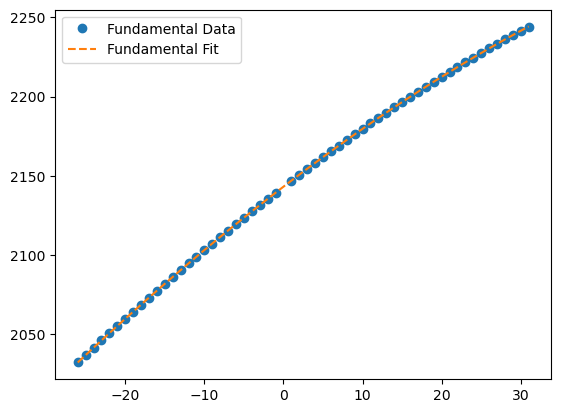

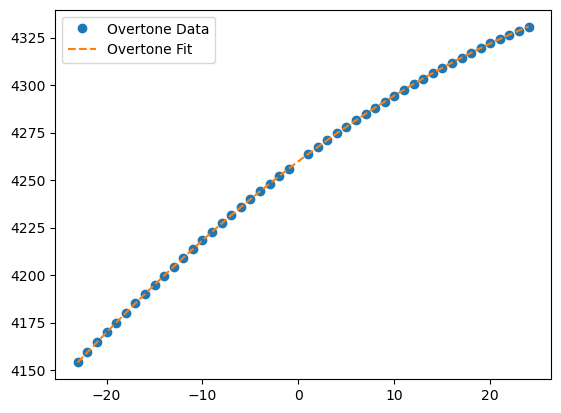

In [68]:
data_f = np.loadtxt(fund_url,  delimiter=',')
data_o = np.loadtxt(over_url, delimiter=',')

# fundamental
x_f = data_f[:,1]
y_f = data_f[:,0]

# overtone
x_o = data_o[:,1]
y_o = data_o[:,0]


# extract parameters from data
fund_dict = extract_fit(x_f, y_f)
over_dict = extract_fit(x_o, y_o)


# get lines of best fit from data
x_f_fit = fund_dict["x-fit"]
y_f_fit = fund_dict["y-fit"]

x_o_fit = over_dict["x-fit"]
y_o_fit = over_dict["y-fit"]



# Plot the data and the fitted curve
plt.plot(x_f, y_f, 'o', label='Fundamental Data')
plt.plot(x_f_fit, y_f_fit, '--', label='Fundamental Fit')
plt.legend()
plt.show()

# Plot the data and the fitted curve
plt.plot(x_o, y_o, 'o', label='Overtone Data')
plt.plot(x_o_fit, y_o_fit, '--', label='Overtone Fit')
plt.legend()
plt.show()


*Good place to make the students comment on the energy level difference, good visual*

We will now compute rotational and vibrational parameters from this fit.
The following block will store the polynomial coefficients from the fundamental, overtone, and isotope
data.  We have a cubic polynomial fit to each data set as follows:

$$ \bar{\nu} = a_0 + a_1 m + a_2 m^2 + a_3 m^3 $$ 

We will associate the coefficients from the fundamental data as follows:

$a_n \rightarrow $ `an_f`

from the overtone data as

$a_n \rightarrow $ `an_o`

and from the isotope data as

$a_n \rightarrow $ `an_i`


In [37]:
a0_f = fund_dict["a0"]
a1_f = fund_dict["a1"]
a2_f = fund_dict["a2"]
a3_f = fund_dict["a3"]

a0_o = over_dict["a0"]
a1_o = over_dict["a1"]
a2_o = over_dict["a2"]
a3_o = over_dict["a3"]

# need isotope data
print(a0_o)
print(a1_o)
print(a2_o)
print(a3_o)

4259.893036825371
3.8102013196431637
-0.03501022213904199
-2.5410406073979986e-05


Next we will complete some functions that will to enable us to compute various rotational and vibrational properties. The format for this section is as follows:

1. We will provide the relevant equation
2. We will provide a related function template with documentation that you must complete with python code that implements the relevant equation
3. We will provide a block of code to be completed that calls the relevant function on your stored data to compute properties from your data.

A.  Implement a function to compute reduced mass based on the equation

$$ \mu = \frac{m_A m_B}{m_A + m_B} $$

In [27]:
def compute_reduced_mass(mass_a, mass_b):
    """
    Compute reduced mass using this formula
    
    mu = mass_a * mass_b / (mass_a + mass_b)
    
    Arguments
    ---------
    mass_a : float
        the mass of atom a in kg (e.g. mass of C) 
        
    mass_b : float
        the mass of atom b in kg (e.g. mass of O)
    
    Returns
    -------
    mu : float
        the reduced mass of the diatomic (e.g. reduced mass of CO)
    """
    
    #<== insert code to compute mu here
    mu = mass_a * mass_b / (mass_a + mass_b)
    return mu


assert np.isclose(compute_reduced_mass(_reference_mass_C12, _reference_mass_O16) * 1e20, _reference_mu_co * 1e20)

Define the mass of $^{12}$C and $^{16}$O in kilograms and store to the variables `mass_C12` and `mass_O16`
and then call the `compute_reduced_mass()` function on those two masses and store the output to 
`mu_CO`.

In [38]:
#<== assign mass of carbon 12 here 
mass_C12 = _reference_mass_C12

#<== assign mass of oxygen 16 here 
mass_O16 = _reference_mass_O16

#<== compute reduced mass of CO here 
mu_CO = compute_reduced_mass(mass_C12, mass_O16)


print(mu_CO)
assert np.isclose(mu_CO * 1e20, _reference_mu_co * 1e20)

1.1376323719328456e-26


$$ \alpha = -a_2 $$


In [39]:
def compute_alpha(a_2):
    """
    Compute the \alpha value from a given a_2 value using the formula
    alpha = - a_2
    
    Arguments
    ---------
    a_2 : float
        the quadratic coefficient a_2 from your polynomial fit
    
    Returns
    -------
    alpha : float
        The quadratic contribution to the rotational constant 
    """
    
    #<== insert code to compute alpha here
    alpha = - a_2
    
    return alpha

Compute an $\alpha$ value for your fundamental data using the variable `a2_f` as input and
store it to a variable called `alpha_f`.  Then, compute an $\alpha$ value for your overtone data 
using the variable `a2_o` as niput and store it to a variable called `alpha_o`.

In [40]:
#<== insert code to compute alpha_f from a2_f using the compute_alpha() function
alpha_f = compute_alpha(a2_f)

alpha_o = compute_alpha(a2_o)

print(alpha_f, alpha_o)

0.017506389984474735 0.03501022213904199


$$ B_e = \frac{a_1}{2} + \alpha $$

In [41]:
def compute_Be(a_1, a_2):
    """
    Compute the Be value from given a_1 and a_2 values, using the formula
    Be = a_1 / 2 + alpha
    
    where you can use the compute_alpha() function to compute alpha from a_2
    
    Arguments
    ---------
    a_1 : float
        the linear coefficient from your polynomial fit 
    
    a_2 : float
        the quadratic coefficient from your polynomial fit
    
    Returns
    -------
    Be : float
        The rotational constant in wavenumbers
    
    """
    
    #<== insert code to compute alpha here
    alpha = compute_alpha(a_2)
    
    #<== insert code to compute Be here
    Be = a_1 / 2 + alpha
    
    return Be
    
    

In [42]:
# Be for fundamental
Be_f = a1_f / 2 + alpha_f

# Be for overtone
Be_o = a1_o / 2 + alpha_o

print(Be_f, Be_o)

1.9311559637590243 1.9401108819606239


$$ I = \frac{h}{8 \pi^2 c B_e} $$

In [43]:
def compute_I(Be):
    """
    Compute the moment of inertia I value from given Be value using the formula
    I = h / (8 * pi^2 * c * Be)
    
    Arguments
    ---------
    Be : float
        the rotational constant in wavenumbers
    
    Returns
    -------
    I : float
        The moment of inertia in SI units (kg * m^2)
    
    """
    # speed of light in cm / s
    c = constants.c * 100
    
    # Planck's constant in SI units
    h = constants.h
    
    #<== insert code to compute I here
    I = h / ( 8 * np.pi ** 2 * c * Be)
    return I

In [44]:
# I for fundamental
I_f = compute_I(Be_f) #constants.h / (8 * constants.pi ** 2 * c_cms * Be_f)

# I for overtone
I_o = compute_I(Be_o) #constants.h / (8 * constants.pi ** 2 * c_cms * Be_o)
print(I_f, I_o)

1.4495334591457219e-46 1.442842886107951e-46


$$ r_e = \sqrt{\frac{I}{\mu} } $$
* Add a question about this! *  

In [45]:
def compute_re(I, mu):
    """
    Compute the equilibrium bondlength from the moment of inertia and reduced mass
    re = sqrt{ I / mu }
    
    Arguments
    ---------
    I : float
        the rotational constant in SI units 
        
    mu : float
        the reduced mass in SI units
    
    Returns
    -------
    re : float
        The equilibrium bondlength in SI units
    
    """
    #<== insert code to compute re here!
    re = np.sqrt( I / mu )
    
    return re

In [46]:
# equilibrium bondlength from fundamental
r_eq_f = compute_re( I_f, mu_CO) #np.sqrt(I_f / co_mu)

# equibibrium bondlength from overtone
r_eq_o = compute_re(I_o, mu_CO) #np.sqrt(I_o / co_mu)


print(r_eq_f, r_eq_o)

1.1287899950556337e-10 1.1261819190878598e-10


$$ D = -\frac{a_3}{4} $$

In [48]:
def compute_D(a_3):
    """
    Compute the dissociation energy in wavenumbers
    D = -a_3 / 4
    
    Arguments
    ---------
    a_3 : float
        the cubic coefficient from your polynomial fit
    
    Returns
    -------
    D : float
        The dissociation energy in wavenumbers
    
    """
    #<== insert code to compute D here!
    D = -a_3 / 4
    
    return D

In [49]:
# D for fundamental
D_f = compute_D(a3_f) # -a3_f / 4

# D for overtone
D_o = compute_D(a3_o) #-a3_o / 4

print(D_f, D_o)

6.060731667970598e-06 6.3526015184949965e-06


Ask students to comment on I comparison between fund and overtone

$$ v_e = 3 a_{0,f} - a_{0,o} $$

In [50]:
def compute_nu_e(a0_f, a0_o):
    """
    Compute the Harmonic frequency
    nu_e = 3 a0_f - a0_o
    
    Arguments
    ---------
    a0_f : float
        the constant coefficient from the polynomial fit to fundamental data
        
    a0_o : float
        the constant coefficient from the polynomial fit to the overtone data 
    
    Returns
    -------
    nu_e : float
        The harmonic approximation to the vibrational frequency in wavenumbers
    
    """
    #<== insert code to compute nu_e here!
    nu_e = 3 * a0_f - a0_o
    
    return nu_e

In [58]:

ve = compute_nu_e(a0_f, a0_o) 
print(ve)

2169.621421122867


$$ v_{xe} = \frac{v_e - a_{0,f}}{2} $$

In [59]:
def compute_nu_xe(nu_e, a0_f):
    """
    Compute the anharmonic correction
    nu_xe = (nu_e - ao_f) / 2
    
    Arguments
    ---------
    nu_e : float
        the harmonic vibrational contribution
        
    a0_f : float
        the constant coefficient from the polynomial fit to the fundamental data 
    
    Returns
    -------
    nu_xe : float
        The anharmonic correction in wavenumbers
    
    """
    #<== insert code to compute nu_xe here!
    nu_xe = (nu_e- a0_f) / 2
    
    return nu_xe

In [60]:
vxe = compute_nu_xe(ve, a0_f) #(ve - a0_f) / 2
print(vxe)

13.224967570060471


$$ k = (2 \pi c v_e)^2 \cdot \mu $$

In [55]:
def compute_k(nu_e, mu):
    """
    Compute the Harmonic force constant k = (2 * pi * c * nu_e)^2  * mu
    
    Arguments
    ---------
    nu_e : float
        the harmonic vibrational contribution
        
    mu : float
        the reduced mass in SI units
    
    Returns
    -------
    k : float
        The harmonic force constant in SI units (kg * m^2 / s^2)
    
    """
    # speed of light in cm / s
    c = constants.c * 100
    
    #<== insert code to compute k here
    k = (2 * np.pi * c * nu_e) ** 2 * mu
    
    return k

In [62]:
k = compute_k(ve, mu_CO) #(2 * constants.pi * constants.c * 100 * ve) ** 2 * co_mu
print(k)

nu_overbar = 1 / (np.pi * 2 * constants.c * 100) * np.sqrt(k / mu_CO)
print(nu_overbar)

1900.076140021917
2169.621421122867


$$ \beta = \sqrt{\frac{8 \pi^2 \cdot c \cdot v_{xe} \cdot \mu}{h}} $$

In [63]:
def compute_beta(nu_xe, mu):
    """
    Compute the Harmonic force constant beta = sqrt( ( 8 pi^2 c nu_xe mu ) / h )
    
    Arguments
    ---------
    nu_se : float
        the anharmonic vibrational contribution
        
    mu : float
        the reduced mass in SI units
    
    Returns
    -------
    beta : float
        The exponential factor for the Morse potential
    
    """
    # speed of light in cm / s
    c = constants.c * 100
    
    # plancks constant in SI units
    h = constants.h
    
    beta = np.sqrt((8 * np.pi ** 2 * c * nu_xe * mu) / h)
    
    return beta

$$ D_e = \frac{k}{2\beta^2} $$

In [64]:
def compute_De(k, beta):
    """
    Compute the dissociation energy
    
    Arguments
    ---------
    k : float
        the harmonic force constant
        
    beta : float
        the exponential term in the Morse potential
    
    Returns
    -------
    De : float
        The dissociation energy in SI units
    
    """
    
    #<== insert code to compute De here
    De = k / ( 2 * beta **2 )
    
    return De

# Vibrational Energy
The Schrödinger equation for vibrational motion has the form:

$-\frac{\hbar^2}{2\mu} \frac{d^2\psi}{dr^2} + V(r)\cdot\psi = E_{vib}\psi$   


where the first term is the quantum mechanical operator for the kinetic energy of the oscillator and V(r) is the operator for potential energy. This equation typically yields a set of allowed states represented by the wavefunctions $\{\psi_v(r)\}$ with corresponding energies $\{E_{vib,v}\}$. The solutions depend on the detailed form of the potential energy which is determined by the electronic structure of the diatomic molecule and is in general quite complicated.

## Harmonic Oscillator Model

Harmonic oscillator model: We first consider the simplest model for vibration, the harmonic oscillator. The potential energy for this model is parabolic:

Eq. 3:

$V(r) = \frac{1}{2}k(r - r_e)^2$

and is plotted to the left in Fig. 2. The parameter k is called the force constant and represents the stiffness of the bond.
##Insert question about what force constant is and maybe make them compare single vs double bond?

For this potential energy function, the Schrödinger equation can be solved exactly to give a simple expression for the vibrational energy levels. The energy in wavenumber units (cm<sup>-1</sup>) is

Eq. 4	$\frac{E_{vib}}{hc}=ν ̃_e (v+1/2) $	   	v = 0,1,2,3,…

where v is the vibrational quantum number and ν is the vibrational frequency (divided by c) with:

Eq. 5:
$ν ̃_e = \frac{1}{2 \pi c} \sqrt{\frac{k}{\mu}}  $

# Need to make v and nu look different!
Note: the notation here is the same as used by NGSK, but one must be careful to distinguish the symbols v (vibrational quantum number) and $ν ̃ $ (vibrational frequency in wavenumbers). The energy levels are plotted in blue in Fig. 2 and are seen to be equally spaced with separation $hcν ̃_e$.

## add section about allowed transitions and assumptions

In [ ]:
beta = np.sqrt((8 * np.pi ** 2 * constants.c * 100 * vxe * co_mu)/constants.h)
print(F'{beta:12.7e}')

2.3192151e+10


In [ ]:
De = k / (2 * beta ** 2)
print(De)

1.767624634453031e-18


Now we have extracted both Harmonic and Morse parameters from our data!  We can proceed to use these parameters to encode interatomic potentials in the Harmonic and Morse approximations and use this to predict the positions of the ro-vibrational peaks.

We will first approach this using Perturbation theory.

### Perturbation Theory
 We will illustrate the use of Perturbation Theory approximate these transition energies.  

Here we will consider the Hamiltonian
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{H}(r) + V'(r) = \hat{H}_0 + V'(r) \tag{12},
\end{equation}
where $\hat{H}_0$ is exactly solved by the Harmonic oscillator energy eigenfunctions and eigenvalues ($\psi^{(0)}_n(r)$, $E^{(0)}_n$), and $V'(r)$ is the perturbation which will take the form of
$V'(r) = V_{Morse} - V_{H}.$

We can calculate the energy of state $n$ at 2nd order of perturbation theory as follows:
\begin{equation}
E_n = E_n^{(0)} +  \langle \psi_n^{(0)} | V'(r) | \psi_n^{(0)} \rangle + \sum_{k \neq n} \frac{|\langle \psi_k^{(0)} | V'(r) | \psi_n^{(0)}|^2}{E_n^{(0)}-E_k^{(0)}}. \tag{13}
\end{equation}

Recall that for the zeroth-order functions have the form
\begin{align}
\psi_n^{(0)}(r) &= \sqrt{\frac{1}{2^n n!}} \cdot \left(\frac{\alpha}{\pi} \right)^{1/4} \cdot H_n \left(\sqrt{\alpha} r \right) \cdot {\rm exp}\left(\frac{-\alpha }{2} r^2 \right) \\
\alpha &= \frac{\mu \omega}{\hbar} \\
\omega &= \sqrt{\frac{k}{\mu}}
\end{align}

### Approach
We will compute the fundamental transition ($E_1 - E_0$) using the following approaches:
1. Harmonic approximation: $E_1 - E_0 = \hbar \omega$
2. Evaluation of Eq. (13) for $n=0$ and $n=1$ to second order using $V'(r)$



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import hermite
from math import factorial
# import pyscf libraries
from scipy import interpolate

def compute_alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{k * \omega / \hbar}

    Arguments
    ---------
    k : float
        the Harmonic force constant

    mu : float
        the reduced mass

    hbar : float
        reduced planck's constant

    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}

    """
    # compute omega
    omega = np.sqrt( k / mu )

    # compute alpha
    alpha =  mu * omega / hbar

    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    Returns
    -------
    N_n : float
        the normalization constant
    """

    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4)

def psi(n, alpha, r, r_eq):
    """ Helper function to evaluate the Harmonic Oscillator energy eigenfunction for state n

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    alpha : float
        alpha value


    r : float
        position at which psi_n will be evaluated

    r_eq : float
        equilibrium bondlength

    Returns
    -------
    psi_n : float
        value of the harmonic oscillator energy eigenfunction

    """

    Hr = hermite(n)

    psi_n = N(n, alpha) * Hr( np.sqrt(alpha) * ( r - r_eq )) * np.exp( -0.5 * alpha  * (r - r_eq)**2)

    return psi_n

def harmonic_eigenvalue(n, k, mu, hbar):
    """ Helper function to evaluate the energy eigenvalue of the harmonic oscillator for state n"""

    return hbar * np.sqrt(k/mu) * (n + 1/2)

def morse_eigenvalue(n, k, mu, De, hbar):
    """ Helper function to evaluate the energy eigenvalue of the Morse oscillator for state n"""

    omega = np.sqrt( k / mu )
    xi = hbar * omega / (4 * De)

    return hbar * omega * ( (n + 1/2) - xi * (n + 1/2) ** 2)

def potential_matrix_element(n, m, alpha, r, r_eq, V_p):
    """ Helper function to compute <n|V_p|m> where V_p is the perturbing potential

    Arguments
    ---------
    n : int
        quantum number of the bra state

    m : int
        quantum number of the ket state

    alpha : float
        alpha constant for bra/ket states

    r : float
        position grid for bra/ket states

    r_eq : float
        equilibrium bondlength for bra/ket states

    V_p : float
        potential array

    Returns
    -------
    V_nm : float
        <n | V_p | m >

    """
    # bra
    psi_n = psi(n, alpha, r, r_eq)

    # ket
    psi_m = psi(m, alpha, r, r_eq)

    # integrand
    integrand = np.conj(psi_n) * V_p * psi_m

    # integrate
    V_nm = np.trapz(integrand, r)

    return V_nm

In [ ]:
# conversion factors from SI to au
Joule_to_au = 2.2937125689e+17
meter_to_au = 1.89e+10

# use the extracted values in SI units and convert them to atomic units
De_au = De * Joule_to_au
r_eq_au = r_eq_f * meter_to_au
beta_au = beta / meter_to_au

# Harmonic force constant can be determined exactly as k = 2 * De * beta ** 2
k_au = 2 * De_au * beta_au ** 2


# array of bondlength values
r_array = np.linspace(0.25, 3 * r_eq_au, 1000)

# array of Morse potential values
V_Morse = De_au * (1 - np.exp(-beta_au * (r_array - r_eq_au))) ** 2
V_H = 0.5 * k_au * (r_array - r_eq_au) ** 2

# get reduced mass of CO
m_O = 1822.89 * 16.
m_C = 1822.89 * 12.01

mu_au = (m_O * m_C)/(m_O + m_C)


# compute the rotational constant at n=0 (equilibrium geometry)
B_au = 1 / (2 * mu_au * r_eq_au ** 2)

In [ ]:
# compute alpha values in atomic units
alpha_au = compute_alpha(k_au, mu_au, 1)

# fundamental transition energy at HO level
fundamental_hf = harmonic_eigenvalue(1, k_au, mu_au, 1) - harmonic_eigenvalue(0, k_au, mu_au, 1)

## fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k_au, mu_au, De_au, 1) - morse_eigenvalue(0, k_au, mu_au, De_au, 1)

# 1st order correction
pt1 = potential_matrix_element(0, 0, alpha_au, r_array, r_eq_au, (V_Morse - V_H))


# 2nd order correction
pt2 = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k_au, mu_au, 1)
    Vc_j0 = potential_matrix_element(j, 0, alpha_au, r_array, r_eq_au, (V_Morse - V_H))
    pt2 += Vc_j0 ** 2 / (fundamental_hf - E_j)



au_to_wn = 219474.63068
print(fundamental_hf * au_to_wn)
print(pt1 * au_to_wn)
print(pt2 * au_to_wn)

print((fundamental_hf + pt1 + pt2) * au_to_wn)
print(fundamental_Morse * au_to_wn)

m = np.linspace(-10, 10, 21, dtype=int)
m = np.delete(m, 10)
print(m)

nu_vs_m = (fundamental_Morse + B_au * m) * au_to_wn

2168.642161895434
5.806778183746978
-17.231512708718878
2157.2174273704622
2142.2161010027276
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7   8
   9  10]


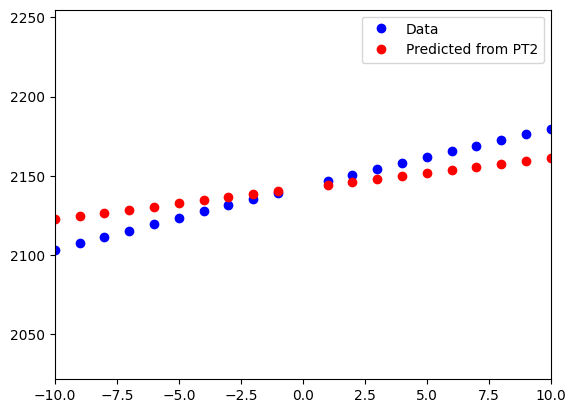

In [ ]:

plt.plot(x_f, y_f, 'bo', label="Data")
plt.plot(m, nu_vs_m, 'ro', label="Predicted from PT2")
plt.xlim(-10, 10)
#plt.ylim(2115, 2155)
#plt.plot(x_o, y_o, 'ro', label="CO overtone")
plt.legend()
plt.show()